<div class="alert alert-block alert-success">
    
# 📏K-NN Hyperparamaters

 👨‍🏫 **Vikesh K**      
 📓 **Lab 07**  
 

</div>

 💡  <span style='font-family:Georgia'>
    <font color= darkred> **"There is no substitute for hard work"** 
    </font> 💡   


## 📝Lab Agenda
    
We will cover:

* sklearn datasets
* train-test split with stratification
* Model Building with different values of k in k-nn
* Visualize the accuracy score for different k

## Importing Modules and data

In [24]:
import numpy as np
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from pprint import pprint
import warnings
warnings.filterwarnings("ignore")
print("Modules ran")

Modules ran


<div class="alert alert-block alert-danger"> 
    
**💡 We will be using the Wisconsin Cancer Dataset to build a `k-nn` model** 
    
**📝 Please read more about the Wisconsin Breast cancer dataset [here](https://scikit-learn.org/stable/datasets/toy_dataset.html)**.[*scroll down in the page*]
    
</div>

In [25]:
url = 'https://raw.githubusercontent.com/vkoul/data/main/misc/wisconsin.csv'
df = pd.read_csv(url)

In [26]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Exploring the data 

In [27]:
df.shape

(569, 31)

In [28]:
df.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

**Split the dataset into Train and Test** 

In [30]:
X = df.drop(columns = 'diagnosis')
y = df['diagnosis']

<div class="alert alert-block alert-danger"> 

**💡Stratified Train-Test Splits**   
One final consideration is for classification problems only.

Some classification problems do not have a balanced number of examples for each class label. As such, it is desirable to split the dataset into train and test sets in a way that preserves the same proportions of examples in each class as observed in the original dataset.

This is called a stratified train-test split.

We can achieve this by setting the `stratify` argument to the y component of the original dataset. This will be used by the `train_test_split()` function to ensure that both the train and test sets have the proportion of examples in each class that is present in the provided “y” array.

Source: [MachineLearning Mastery](https://machinelearningmastery.com/train-test-split-for-evaluating-machine-learning-algorithms/#:~:text=Stratified%20Train%2DTest%20Splits,-One%20final%20consideration&text=As%20such%2C%20it%20is%20desirable,a%20stratified%20train%2Dtest%20split.)

<div/>

## Train Test Split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y 
                                                    ,stratify = y # stratification 
                                                    ,random_state = 66 # for reproducibility
                                                    ,test_size = 0.20)

In [32]:
print(X_train.shape)
print(X_test.shape)

(455, 30)
(114, 30)


### Checking the effect of Stratifcation Effect

**Overall Distribution**

In [33]:
y.value_counts(normalize = True).round(2).to_frame()

,proportion
diagnosis,
0,0.63
1,0.37


**Train Data Distribution**

In [34]:
y_train.value_counts(normalize = True).round(2).to_frame()

,proportion
diagnosis,
0,0.63
1,0.37


**Test Data Distribution**

In [35]:
y_test.value_counts(normalize = True).round(2).to_frame()

,proportion
diagnosis,
0,0.63
1,0.37


<div class="alert alert-block alert-info"> 
    
👨🏼‍💻**Run the above ratio check after commenting out the `stratify` argument in `train_test_split`. Note down your findings**

## Building the model with 3 neighbours

**You may get errors with the code below if your are using Sklearn version 1.3.0. In that case, you would need to install the version 1.2.2 of sklearn and may also need to install `threadpoolctl==3.1.0` to remove the `split` error**

In [36]:
import sklearn

sklearn.__version__

'1.2.2'

In [37]:
# !pip install threadpoolctl==3.1.0

**[Sklearn Error](https://github.com/scikit-learn/scikit-learn/issues/26768)**

In [38]:
# !pip uninstall scikit-learn

In [39]:
# !pip install scikit-learn==1.2.2

In [40]:
# build the model
clf = KNeighborsClassifier(n_neighbors= 3)

# fit the model 
clf.fit(X_train, y_train)

# # record training set accuracy
train_acc = clf.score(X_train, y_train)
print(f"The train data accuracy is {train_acc :.2%}")

# # record test accuracy
test_acc = clf.score(X_test, y_test)
print(f"The test data accuracy is {test_acc :.2%}")

The train data accuracy is 95.82%
The test data accuracy is 91.23%


## Accuracy scores across values of k

**We will make use of the for- loop to run k-nn models, varying the `n_neighbors` argument of the function**

In [41]:
# empty list that will be populated
training_accuracy = [] 
test_accuracy = []

# try n_neighbors from 1 to 51
neighbors_settings = range(1, 51)

for n_neighbors in neighbors_settings:
    
    # build the model
    clf = KNeighborsClassifier(n_neighbors= n_neighbors)
    clf.fit(X_train, y_train)
    
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    

**[`pprint`](https://docs.python.org/3/library/pprint.html) provides a capability to “pretty-print” arbitrary Python data structures**

In [42]:
# pprint(test_accuracy)
# # print("-------")
# pprint(training_accuracy)

In [43]:
len(test_accuracy)

50

In [44]:
len(training_accuracy)

50

## Visualise the results

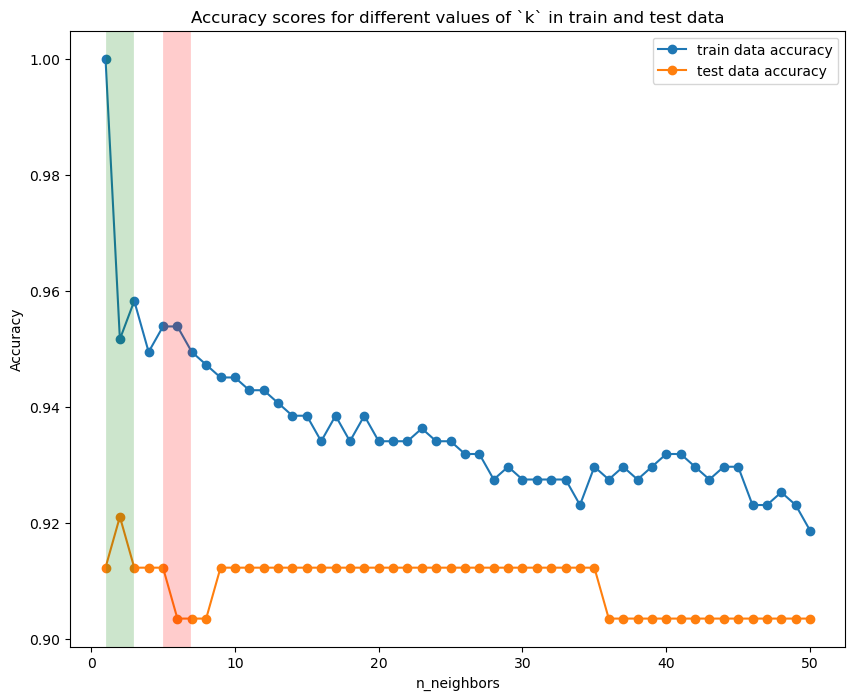

In [45]:
plt.figure(figsize= (10, 8))

plt.plot(neighbors_settings, training_accuracy, marker = "o", label = "train data accuracy")
plt.plot(neighbors_settings, test_accuracy, marker = "o",  label = "test data accuracy")

# highlight the max and min accuracy values
plt.axvline(x = test_accuracy.index(max(test_accuracy))+1, linewidth = 20, alpha = 0.2, color = "green")
plt.axvline(x = test_accuracy.index(min(test_accuracy))+1, linewidth = 20, alpha = 0.2, color = 'red')


plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.title("Accuracy scores for different values of `k` in train and test data")

plt.legend();